<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/Forecasting_Model_based_methods(PlasticSales).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving PlasticSales.csv to PlasticSales.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
ps = pd.read_csv("PlasticSales.csv")
ps

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


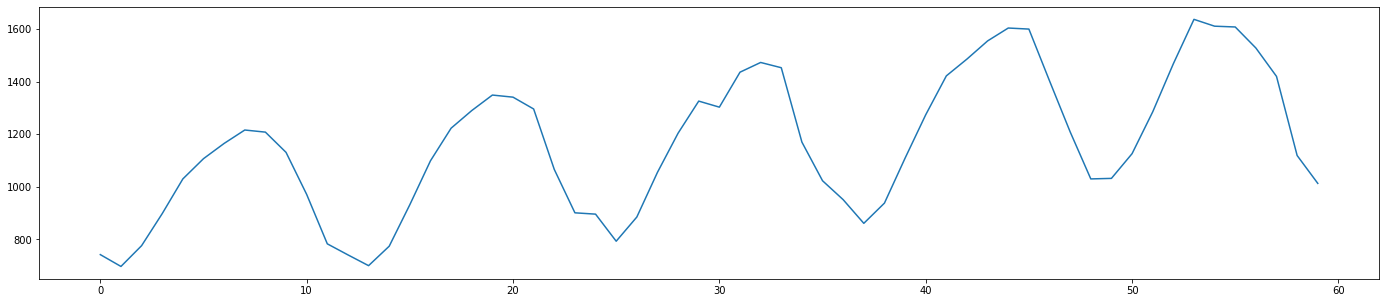

In [6]:
plt.figure(figsize=(24,5))
ps.Sales.plot()

In [ ]:
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [70]:
ps["Date"] = pd.to_datetime(ps.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

ps["month"] = ps.Date.dt.strftime("%b") # month extraction
ps["year"] = ps.Date.dt.strftime("%y") # year extraction

#ps["Day"] = ps.Date.dt.strftime("%d") # Day extraction
#ps["wkday"] = ps.Date.dt.strftime("%A") # weekday extraction

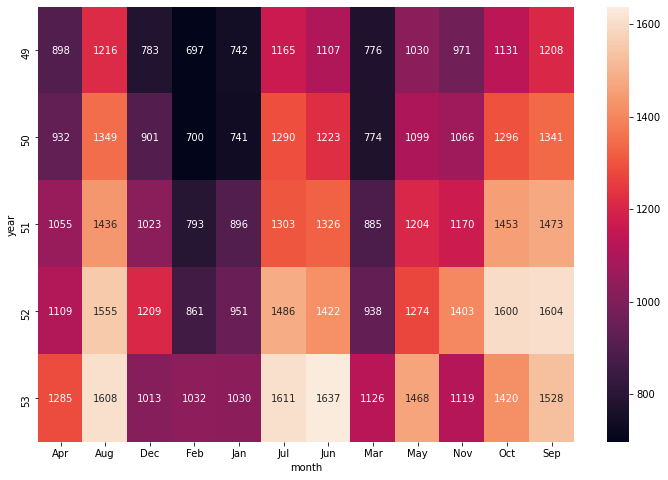

In [10]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=ps,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


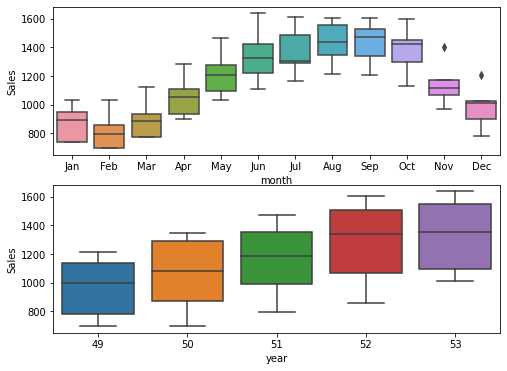

In [11]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=ps)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=ps)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


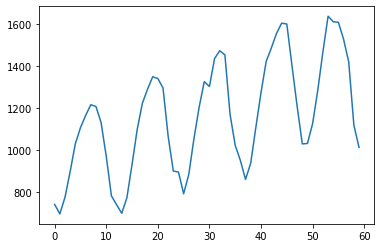

In [58]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
#import numpy as np
p = ps["Month"][0]
p[0:3]
ps['months']= 0

for i in range(60):
    p = ps["Month"][i]
    ps['months'][i]= p[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(ps['months']))
ps1 = pd.concat([ps.Sales,month_dummies],axis = 1)

ps1["t"] = np.arange(1,61)

ps1["t_square"] = ps1["t"]*ps1["t"]
ps1.columns
ps1["log_Sales"] = np.log(ps1["Sales"])
ps1.rename(columns={"Sales ": 'Sales'}, inplace=True)
ps1.Sales.plot()

In [60]:
ps1

,Sales,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Sales
0,742,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,697,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,776,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,898,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,1030,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314
5,1107,0,0,0,0,0,0,1,0,0,0,0,0,6,36,7.009409
6,1165,0,0,0,0,0,1,0,0,0,0,0,0,7,49,7.060476
7,1216,0,1,0,0,0,0,0,0,0,0,0,0,8,64,7.103322
8,1208,0,0,0,0,0,0,0,0,0,0,0,1,9,81,7.096721
9,1131,0,0,0,0,0,0,0,0,0,0,1,0,10,100,7.030857


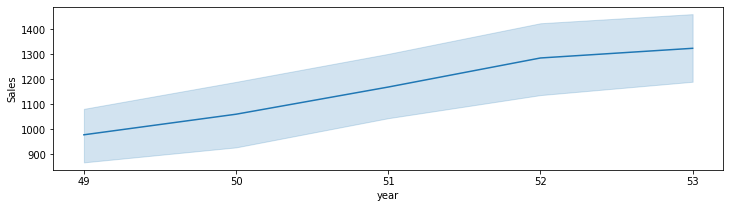

In [71]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=ps)

# Splitting data

In [36]:
Train = ps1.head(47)
Test = ps1.tail(12)

In [33]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

268.92939423677103

In [37]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


278.65928380826693

In [39]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

343.24692406175336

In [40]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

237.55605454487218

In [42]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

208.5717769318734

In [44]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

241.6101394283217

In [45]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

151.29373108290937

In [46]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,151.293731
4,rmse_add_sea_quad,208.571777
3,rmse_add_sea,237.556055
5,rmse_Mult_sea,241.610139
0,rmse_linear,268.929394
1,rmse_Exp,278.659284
2,rmse_Quad,343.246924
